In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
# Training a binary logistic regression model deciding whether a flower instance is 'virginica'. Using a single feature for 
# decision boundary visualization purposes 

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

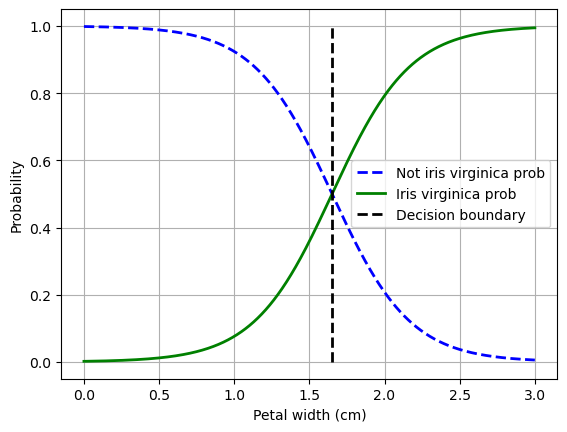

In [22]:
# Simulate increasing petal width
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# predict prob for virginica for each increasing petal width.
# outputs prob NO, prob YES for each instance
y_proba = log_reg.predict_proba(X_new) 

# get the first example where the YES prob is above 0.5
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0] 

plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2, label="Not iris virginica prob")
plt.plot(X_new, y_proba[:, 1], 'g-', linewidth=2, label="Iris virginica prob")
plt.plot([decision_boundary, decision_boundary], [0,1], 'k--', linewidth=2, label="Decision boundary")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

plt.legend()
plt.grid()

# We can see that with respect to a single feature - petal width - the model will output YES for an example if the petal width is 
# above 1.6. 

In [24]:
# Training the model on all 3 classes using softmax

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=30, random_state=42)

In [26]:
print (softmax_reg.predict([[5,2]]))
print (softmax_reg.predict_proba([[5,2]]).round(2))

[2]
[[0.   0.04 0.96]]
